# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Standard Section 2: Prediction using kNN and Linear Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors:** Pavlos Protopapas, Kevin Rader<br/>
**Section Leaders:** Cecilia Garraffo, Mehul Smriti Raje, Ken Arnold, Karan Motwani<br/>

In [171]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("http://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

For this section, our goal is to get you familiarized with k-Nearest Neighbors and Linear. These methods find powerful applications in all walks of life and are centered around prediction. 


Specifically, we will: 
    
    1. Review Basic Python Data Structures
    2. Import Data and Manipulates Rows and Columns
    3. Load in the Bikeshare dataset which is split into a training and testing dataset
    3. Do some basic exploratory analysis of the dataset and go through a scatterplot
    5. Write out the algorithm for kNN WITH AND WITHOUT using the sklearn package
    6. Learn to use the sklearn package for Linear Regression.
    7. What is and how to extract information about Confidence Intervals.

For this section we will be using the following packages:

In [172]:
#Check Python Version
import sys
assert(sys.version_info.major==3),print(sys.version)

#Matrices, Dataframe and Plotting Operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Model Packages for k-NN and Linear Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import statsmodels.api as sm

#Metrics, Performance Evaluation and Helpful fucntions
from sklearn import metrics, datasets
from collections import Counter
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#Aesthetic settings
from IPython.display import display
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)

## Review – Python : List, Dictionary Comprehensions and Zip

<div class='exercise'> **Exercise**</div>

In [173]:
#Makes a list of all the even numbers from 0 to 20 with a For Loop

##Your Code Here

**Solution**

In [373]:
# %load sol1

<div class='exercise'> **Exercise**</div>

In [175]:
#Create a dictionary with the list A elements as keys and list B elements 
#as values using Zip and Dictionary Comprehension

list_a = ['a','b','c','d','e']
list_b = [1,2,3,4,5]

##Your Code Here

In [366]:
# %load sol2
#Function to takes in a dataset and normalizes it
#Define Lists of Elements
list_a = ['a','b','c','d','e']
list_b = [1,2,3,4,5]

#Regular For Loop
l = {}
for i in range(len(list_a)):
    l[list_a[i]] = list_b[i]
print(l)

#Dictionary Comprehension
l = {list_a[i]:list_b[i] for i in range(len(list_a))}
print(l)

#Using Zip
l = dict(zip(list_a, list_b))
print(l)


# Working with Dataframes

## Importing Data 

In [177]:
#Import Data
data_path = 'data/states.csv'
states = pd.read_csv(data_path, index_col=0)
states.head()

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
Alabama,0,1250,9046,127901,309527,590756,771623,964201,996992,1262505,...,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,4447100,4779736
Alaska,0,0,0,0,0,0,0,0,0,0,...,55036,59278,72524,128643,226167,300382,401851,550043,626932,710231
Arizona,0,0,0,0,0,0,0,0,9658,40440,...,334162,435573,499261,749587,1302161,1770900,2718215,3665228,5130632,6392017
Arkansas,0,0,1062,14273,30388,97574,209897,435450,484471,802525,...,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,2673400,2915918
California,0,0,0,0,0,0,92597,379994,560247,864694,...,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,33871648,37253956


Data describing the population per state from 1900 to 2010

### Select Specific Columns

<div class='exercise'> **Exercise**</div>

In [178]:
#Select by Name : Select only '1930','1940','1950','1960' columns.

#Select by Index : Select only the first 3 columns

#Select by List : Select the following list of columns
columns_list = ['1920','1840']

**Solution**

In [179]:
# %load sol3.py
#Select by Name : Filter out only '1930','1940','1950','1960' columns.
display(states[['1930','1940','1950','1960']].head())

#Select by Index : Filter out only first 3 columns
display(states.iloc[:,0:3].head())

#Select by List : Filter out following list of columns
columns_list = ['1920','1840']
display(states[columns_list].head())


,1930,1940,1950,1960
Alabama,2646248,2832961,3061743,3266740
Alaska,59278,72524,128643,226167
Arizona,435573,499261,749587,1302161
Arkansas,1854482,1949387,1909511,1786272
California,5677251,6907387,10586223,15717204


,1790,1800,1810
Alabama,0,1250,9046
Alaska,0,0,0
Arizona,0,0,0
Arkansas,0,0,1062
California,0,0,0


,1920,1840
Alabama,2348174,590756
Alaska,55036,0
Arizona,334162,0
Arkansas,1752204,97574
California,3426861,0


### Learn to "display", always!

In the above statements, we use the display function which can be imported using ```from IPython.display import display```. It provides a very aesthetically pleasing representation of the data with great demarcation for row and column information. Let's see a comparison below :

In [180]:
print(states[columns_list].head())

               1920    1840
Alabama     2348174  590756
Alaska        55036       0
Arizona      334162       0
Arkansas    1752204   97574
California  3426861       0


In [181]:
display(states[columns_list].head())

,1920,1840
Alabama,2348174,590756
Alaska,55036,0
Arizona,334162,0
Arkansas,1752204,97574
California,3426861,0


### Select Specific Rows

<div class='exercise'> **Exercise**</div>

In [182]:
#Filter out by First N Rows
n = 25

#Select by Index, rows 5 to 10.

#Select by List of Indices below
row_list = np.arange(1,25,2)
print(row_list)

[ 1  3  5  7  9 11 13 15 17 19 21 23]


**Solution**

In [183]:
# %load sol4.py
#Filter out by First N Rows
n = 25
display(states.head(n))

#Select by Index, rows 5 to 10.
display(states.iloc[5:10,:])

#Select by List of Indices below
row_list = np.arange(1,25,2)
print(row_list)
display(states.iloc[row_list,:])


,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
Alabama,0,1250,9046,127901,309527,590756,771623,964201,996992,1262505,...,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,4447100,4779736
Alaska,0,0,0,0,0,0,0,0,0,0,...,55036,59278,72524,128643,226167,300382,401851,550043,626932,710231
Arizona,0,0,0,0,0,0,0,0,9658,40440,...,334162,435573,499261,749587,1302161,1770900,2718215,3665228,5130632,6392017
Arkansas,0,0,1062,14273,30388,97574,209897,435450,484471,802525,...,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,2673400,2915918
California,0,0,0,0,0,0,92597,379994,560247,864694,...,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,33871648,37253956
Colorado,0,0,0,0,0,0,0,34277,39864,194327,...,939629,1035791,1123296,1325089,1753947,2207259,2889964,3294394,4301261,5029196
Connecticut,237946,251002,262042,275202,297675,309978,370792,460147,537454,622700,...,1380631,1606903,1709242,2007280,2535234,3031709,3107576,3287116,3405565,3574097
Delaware,59096,64273,72674,72749,76748,78085,91532,112216,125015,146608,...,223003,238380,266505,318085,446292,548104,594338,666168,783600,897934
District of Columbia,0,8144,15471,23336,30261,33745,51687,75080,131700,177624,...,437571,486869,663091,802178,763956,756510,638333,606900,572059,601723
Florida,0,0,0,0,34730,54477,87445,140424,187748,269493,...,968470,1468211,1897414,2771305,4951560,6789443,9746324,12937926,15982378,18801310


,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
Colorado,0,0,0,0,0,0,0,34277,39864,194327,...,939629,1035791,1123296,1325089,1753947,2207259,2889964,3294394,4301261,5029196
Connecticut,237946,251002,262042,275202,297675,309978,370792,460147,537454,622700,...,1380631,1606903,1709242,2007280,2535234,3031709,3107576,3287116,3405565,3574097
Delaware,59096,64273,72674,72749,76748,78085,91532,112216,125015,146608,...,223003,238380,266505,318085,446292,548104,594338,666168,783600,897934
District of Columbia,0,8144,15471,23336,30261,33745,51687,75080,131700,177624,...,437571,486869,663091,802178,763956,756510,638333,606900,572059,601723
Florida,0,0,0,0,34730,54477,87445,140424,187748,269493,...,968470,1468211,1897414,2771305,4951560,6789443,9746324,12937926,15982378,18801310


[ 1  3  5  7  9 11 13 15 17 19 21 23]


,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
Alaska,0,0,0,0,0,0,0,0,0,0,...,55036,59278,72524,128643,226167,300382,401851,550043,626932,710231
Arkansas,0,0,1062,14273,30388,97574,209897,435450,484471,802525,...,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,2673400,2915918
Colorado,0,0,0,0,0,0,0,34277,39864,194327,...,939629,1035791,1123296,1325089,1753947,2207259,2889964,3294394,4301261,5029196
Delaware,59096,64273,72674,72749,76748,78085,91532,112216,125015,146608,...,223003,238380,266505,318085,446292,548104,594338,666168,783600,897934
Florida,0,0,0,0,34730,54477,87445,140424,187748,269493,...,968470,1468211,1897414,2771305,4951560,6789443,9746324,12937926,15982378,18801310
Hawaii,0,0,0,0,0,0,0,0,0,0,...,255912,368336,423330,499794,632772,768561,964691,1108229,1211537,1360301
Illinois,0,2458,12282,55211,157445,476183,851470,1711951,2539891,3077871,...,6485280,7630654,7897241,8712176,10081158,11113976,11426518,11430602,12419293,12830632
Iowa,0,0,0,0,0,43112,192214,674913,1194020,1624615,...,2404021,2470939,2538268,2621073,2757537,2824376,2913808,2776755,2926324,3046355
Kentucky,73677,220959,406511,564317,687917,779828,982405,1155684,1321011,1648690,...,2416630,2614589,2845627,2944806,3038156,3218706,3660777,3685296,4041769,4339367
Maine,96540,151719,228705,298335,399455,501793,583169,628279,626915,648936,...,768014,797423,847226,913774,969265,992048,1124660,1227928,1274923,1328361


## Load in the Bikeshare dataset and perform EDA:

The specific task is to build a regression model for a bike share system that can predict the total number of bike rentals in a given day, based on attributes about the day. Such a demand forecasting model would be useful in planning the number of bikes that need to be available in the system on any given day, and also in monitoring traffic in the city. The data for this problem was collected from the Capital Bikeshare program in Washington D.C. over two years.   

The data set is provided in the file 'bikeshare.csv'. Each row in these files contains 10 attributes describing a day and its weather:
- season (1 = spring, 2 = summer, 3 = fall, 4 = winter)
- month (1 through 12, with 1 denoting Jan)
- holiday (1 = the day is a holiday, 0 = otherwise)
- day_of_week (0 through 6, with 0 denoting Sunday)
- workingday (1 = the day is neither a holiday or weekend, 0 = otherwise)
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp (temperature in Celsius)
- atemp (apparent temperature, or relative outdoor temperature, in Celsius)
- humidity (relative humidity)
- windspeed (wind speed)

and the last column 'count' contains the response variable, i.e. total number of bike rentals on the day.


In [253]:
#Load the BikeShare dataset
bikeshare = pd.read_csv('data/bikeshare.csv')
del bikeshare['Unnamed: 0']
print("Length of Dataset:",len(bikeshare))
display(bikeshare.head())

Length of Dataset: 731


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,2.0,5.0,0.0,2.0,1.0,2.0,24.0,26.0,76.5833,0.118167,6073.0
1,4.0,12.0,0.0,2.0,1.0,1.0,15.0,19.0,73.3750,0.174129,6606.0
2,2.0,6.0,0.0,4.0,1.0,1.0,26.0,28.0,56.9583,0.253733,7363.0
3,4.0,12.0,0.0,0.0,0.0,1.0,0.0,4.0,58.6250,0.169779,2431.0
4,3.0,9.0,0.0,3.0,1.0,3.0,23.0,23.0,91.7083,0.097021,1996.0


In [254]:
display(bikeshare.describe())

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,16.229822,18.885089,62.789406,0.190486,4552.354309
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,11.531101,10.278475,14.242910,0.077498,2021.971365
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-11.000000,-6.000000,0.000000,0.022392,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,10.000000,52.000000,0.134950,3116.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,16.000000,20.000000,62.666700,0.180975,4575.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.000000,27.000000,73.020850,0.233214,6048.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,39.000000,42.000000,97.250000,0.507463,10045.000000


We can also use the groupby function to look at mean stats aggregated by month: 

In [255]:
bikeshare.groupby('month').mean()

,season,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
month,,,,,,,,,,
1.0,1.000000,0.048387,2.870968,0.645161,1.419355,-0.080645,4.145161,58.582827,0.206303,2498.306452
2.0,1.000000,0.035088,3.000000,0.684211,1.368421,3.912281,7.807018,56.746468,0.215684,2824.315789
3.0,1.354839,0.000000,3.096774,0.725806,1.451613,9.580645,13.080645,58.847503,0.222699,3822.241935
4.0,2.000000,0.033333,3.000000,0.666667,1.416667,14.583333,17.783333,58.806312,0.234482,4348.600000
5.0,2.000000,0.032258,2.903226,0.693548,1.403226,22.532258,24.661290,68.895831,0.182989,5268.790323
6.0,2.333333,0.000000,3.100000,0.716667,1.233333,28.150000,29.216667,57.580552,0.185420,5547.033333
7.0,3.000000,0.032258,2.935484,0.661290,1.193548,32.580645,33.338710,59.787632,0.166059,5563.677419
8.0,3.000000,0.000000,3.000000,0.741935,1.306452,29.629032,30.096774,63.773010,0.172918,5584.887097
9.0,3.266667,0.033333,3.050000,0.666667,1.500000,23.850000,25.466667,71.471437,0.165945,5653.316667


Let's plot the variation of count with month? Is  there a seasonal change?

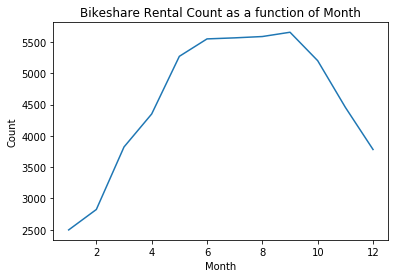

In [256]:
plt.plot(bikeshare.groupby('month').mean()['count'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Bikeshare Rental Count as a function of Month')
plt.show()

What is temp, a_temp, is there a difference?

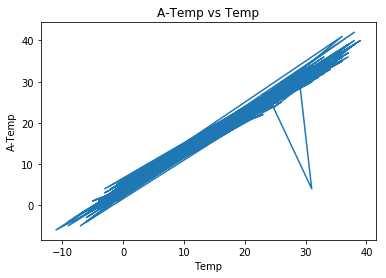

In [257]:
plt.plot(bikeshare['temp'], bikeshare['atemp'])
plt.xlabel('Temp')
plt.ylabel('A-Temp')
plt.title('A-Temp vs Temp')
plt.show()

**What did we do wrong here? Why does the plot look like this?**

Sorting! Whenever your plot makes zig-zag changes across the scale, it is because ```matplotlib``` is trying to connect the points sequentially from the top (using a line plot) and skipping across the scale when $x_{i+1}$ is lower than $x_{i}$. So let's sort.

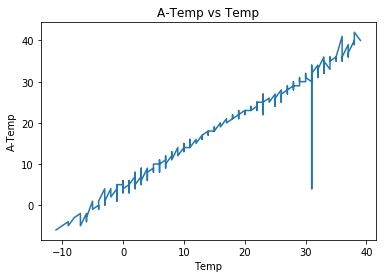

In [258]:
new = bikeshare.sort_values(['temp'])
plt.plot(new['temp'], new['atemp'])
plt.xlabel('Temp')
plt.ylabel('A-Temp')
plt.title('A-Temp vs Temp')
plt.show()

**It still looks weird, why?**

Let's have a closer look at the dataframe:

In [259]:
display(new.head())

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
176,1.0,1.0,0.0,6.0,0.0,1.0,-11.0,-6.0,40.0000,0.171970,981.0
367,1.0,1.0,0.0,1.0,1.0,1.0,-9.0,-4.0,49.1739,0.158330,1416.0
265,1.0,1.0,0.0,0.0,0.0,1.0,-9.0,-5.0,43.6522,0.246600,986.0
346,1.0,1.0,0.0,3.0,1.0,2.0,-8.0,-3.0,41.4583,0.184700,2368.0
612,1.0,2.0,0.0,3.0,1.0,2.0,-7.0,-2.0,49.4783,0.188839,1605.0


There are multiple ```atemp``` values for each ```temp``` value, which if not sorted will bounce around at the same x-value. Thus, we need to sort both axes simultaneously.

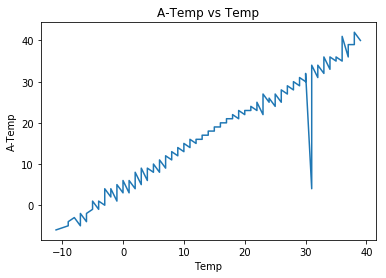

In [260]:
new = bikeshare.sort_values(['temp','atemp'])
plt.plot(new['temp'], new['atemp'])
plt.xlabel('Temp')
plt.ylabel('A-Temp')
plt.title('A-Temp vs Temp')
plt.show()

By plotting efficiently, we found an anomaly we would have otherwise overlooked. It looks like there is a problem with the data around ```temp greater than 30``` and ```atemp less than 10```.

<div class='exercise'> **Exercise**</div>

**Solution**

In [261]:
# %load sol5.py
display(bikeshare[(bikeshare['temp']>30) & (bikeshare['atemp']<10)])


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
188,3.0,8.0,0.0,5.0,1.0,1.0,31.0,4.0,57.0833,0.231354,7148.0


Anomaly! ```atemp``` and ```temp``` are usually lineary related except at this one datapoint. Now, we get to make a judgement call as to whether we should keep the datapoint? We'll come back to this question after the lecture on Missing Data and Imputation. Worth a thought though.

In [262]:
bikeshare= bikeshare.drop([188])

In [263]:
display(bikeshare[(bikeshare['temp']>30) & (bikeshare['atemp']<10)])

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count


### Normalize

In general, it is good practice to normalize data before proceeding. As such, we can create the following functions:

In [264]:
#Function to takes in a dataset and normalizes it
def normalize(x):
    #print(x.shape)
    #print(np.min(x).shape)
    num = x - np.min(x)
    denom = np.max(x) - np.min(x)
    return (num / denom)

#bikeshare_norm = normalize(bikeshare.iloc[:, 0:10])
bikeshare_norm = normalize(bikeshare)
display(bikeshare_norm.head())
bikeshare_norm.describe()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,0.333333,0.363636,0.0,0.333333,1.0,0.5,0.70,0.666667,0.787489,0.197445,0.603711
1,1.000000,1.000000,0.0,0.333333,1.0,0.0,0.52,0.520833,0.754499,0.312814,0.656889
2,0.333333,0.454545,0.0,0.666667,1.0,0.0,0.74,0.708333,0.585689,0.476922,0.732415
3,1.000000,1.000000,0.0,0.000000,0.0,0.0,0.22,0.208333,0.602828,0.303846,0.240347
4,0.666667,0.727273,0.0,0.500000,1.0,1.0,0.68,0.604167,0.943016,0.153852,0.196947


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.498630,0.501619,0.028767,0.499087,0.683562,0.197945,0.544192,0.518864,0.645730,0.346420,0.451641
std,0.370471,0.313986,0.167266,0.334131,0.465405,0.272536,0.230520,0.213973,0.146541,0.159845,0.201643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.272727,0.000000,0.166667,0.000000,0.000000,0.340000,0.333333,0.534704,0.232044,0.308640
50%,0.500000,0.545455,0.000000,0.500000,1.000000,0.000000,0.540000,0.541667,0.644816,0.326919,0.454006
75%,0.666667,0.818182,0.000000,0.833333,1.000000,0.500000,0.740000,0.687500,0.750964,0.434629,0.600718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div class='exercise'> **Exercise**</div>

**Solution**

In [363]:
# %load sol6.py

In [266]:
#Adapt the normalization function above to take column names as input

#Function to takes in a dataset and normalizes it
def normalize_cols(x, columns):
    for i in columns:  x[i] = normalize(x[i]) 
    return x

bikeshare_norm2= normalize_cols(bikeshare ,bikeshare.columns )

In [267]:
display(bikeshare_norm2.head())
bikeshare.describe()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,0.333333,0.363636,0.0,0.333333,1.0,0.5,0.70,0.666667,0.787489,0.197445,0.603711
1,1.000000,1.000000,0.0,0.333333,1.0,0.0,0.52,0.520833,0.754499,0.312814,0.656889
2,0.333333,0.454545,0.0,0.666667,1.0,0.0,0.74,0.708333,0.585689,0.476922,0.732415
3,1.000000,1.000000,0.0,0.000000,0.0,0.0,0.22,0.208333,0.602828,0.303846,0.240347
4,0.666667,0.727273,0.0,0.500000,1.0,1.0,0.68,0.604167,0.943016,0.153852,0.196947


,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.498630,0.501619,0.028767,0.499087,0.683562,0.197945,0.544192,0.518864,0.645730,0.346420,0.451641
std,0.370471,0.313986,0.167266,0.334131,0.465405,0.272536,0.230520,0.213973,0.146541,0.159845,0.201643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.272727,0.000000,0.166667,0.000000,0.000000,0.340000,0.333333,0.534704,0.232044,0.308640
50%,0.500000,0.545455,0.000000,0.500000,1.000000,0.000000,0.540000,0.541667,0.644816,0.326919,0.454006
75%,0.666667,0.818182,0.000000,0.833333,1.000000,0.500000,0.740000,0.687500,0.750964,0.434629,0.600718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's see what the describe function **AFTER** normalization:

## Broadcasting

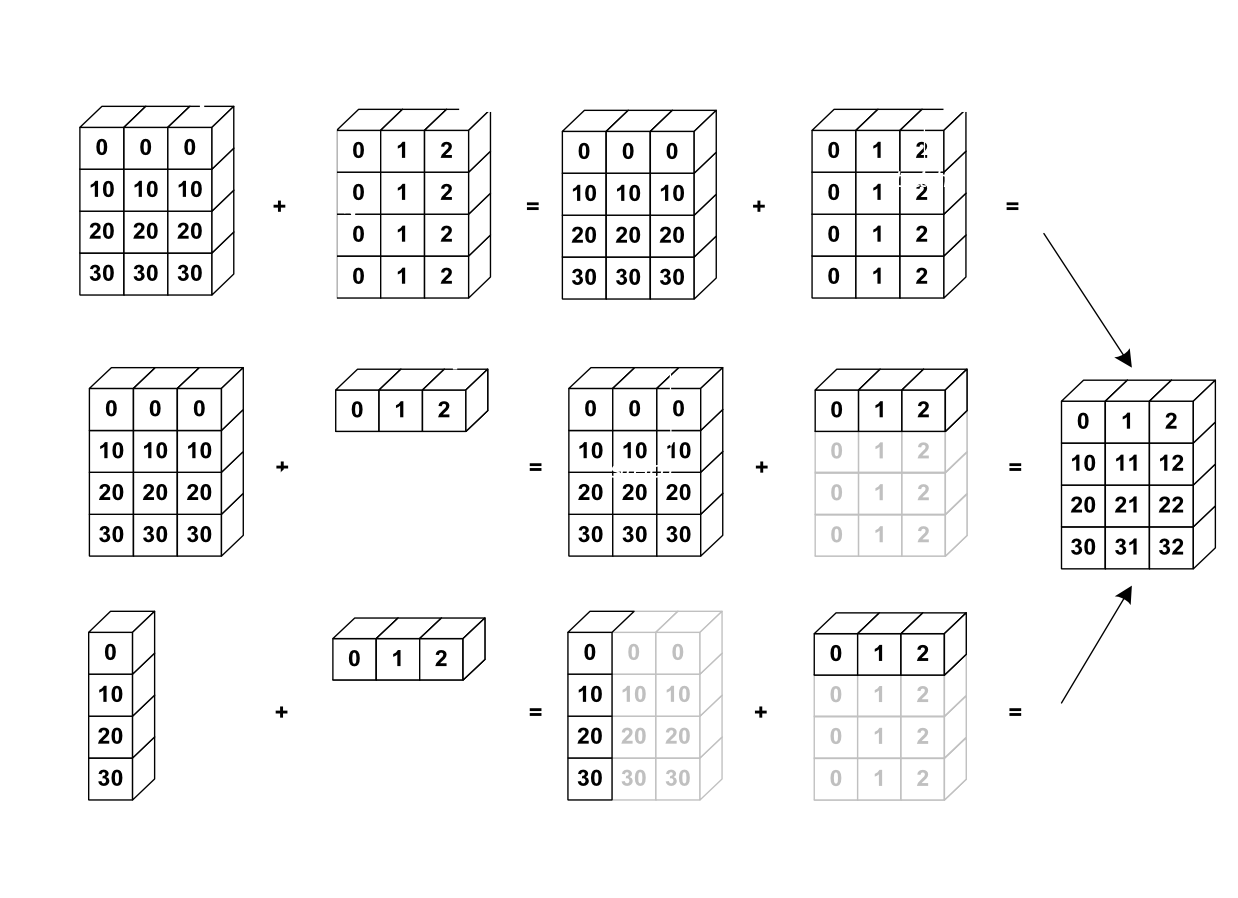

In [199]:
from IPython.display import Image
Image('http://www.scipy-lectures.org/_images/numpy_broadcasting.png')

image from Scipy Lecture Notes

## Choose one predictor

In [268]:
bikeshare.columns
bikeshare.iloc[:,0:10].head()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed
0,0.333333,0.363636,0.0,0.333333,1.0,0.5,0.70,0.666667,0.787489,0.197445
1,1.000000,1.000000,0.0,0.333333,1.0,0.0,0.52,0.520833,0.754499,0.312814
2,0.333333,0.454545,0.0,0.666667,1.0,0.0,0.74,0.708333,0.585689,0.476922
3,1.000000,1.000000,0.0,0.000000,0.0,0.0,0.22,0.208333,0.602828,0.303846
4,0.666667,0.727273,0.0,0.500000,1.0,1.0,0.68,0.604167,0.943016,0.153852


In [269]:
#sns.pairplot(bikeshare, x_vars=bikeshare.iloc[:,:10] , y_vars =bikeshare['count'])

In [270]:
bikeshare = bikeshare[['temp', 'count']]

In [362]:
# %load sol8.py

In [272]:
bikeshare.head()

,temp,count
0,0.70,0.603711
1,0.52,0.656889
2,0.74,0.732415
3,0.22,0.240347
4,0.68,0.196947


## Split up the data into a training set and a test set:

Now that we have an idea of what the data looks like, we would like to predict count. Therefore, we will be breaking up the data into a **training** and a **testing** set. The **training** set will be used to train the model, while the **testing** set will be used to gauge how well our model does in general. The **testing** set is a way for us to ensure our model doesn't overfit our training data.

Let us first create a function that will randomly split the data up into a 70-30 split, with 70% of the data going into the **testing** set:

<div class='exercise'> **Exercise**</div>

In [273]:
#Function to Split data into Train and Test Set, Enter Code Here
def split_data(data):
    
    #Calculate Length of Dataset
    
    #Define Split
    
    #Set a random Seed For Shuffling
    
    #Generate a Mask with a X:Y Split
    
    #Separate train and test data using mask
    
    #Return Train and Test Data Separately
    return data_train, data_test

**Solution**

In [274]:
# %load sol6.py
#Function to Split data into Train and Test Set
def split_data(data):
    
    #Calculate Length of Dataset
    length = len(data)
    
    #Define Split
    split = 0.7
    
    #Set a random Seed For Shuffling
    np.random.seed(9001)
    
    #Generate a Mask with a X:Y Split
    mask = np.random.rand(length) < split
    
    #Separate train and test data
    data_train = data[mask]
    data_test = data[~mask]
    
    #Return Separately
    return data_train, data_test


In [275]:
#Split data using defined function
train_data, test_data = split_data(bikeshare)
print("Length of Training set:",len(train_data))
print("Length of Testing set:",len(test_data))

Length of Training set: 507
Length of Testing set: 223


<div class='exercise'> **Exercise**</div>

In [276]:
## Check that the ratio between test and train sets is right
#Your Code Here

**Solution**

In [277]:
# %load sol7.py
test_data.shape[0]/(test_data.shape[0]+train_data.shape[0])

0.30547945205479454

## Old vs new indices

In [278]:
train_data.head()

,temp,count
0,0.70,0.603711
3,0.22,0.240347
5,0.70,0.441884
6,0.36,0.528085
9,0.82,0.730819


In [279]:
train_data.iloc[:5]

,temp,count
0,0.70,0.603711
3,0.22,0.240347
5,0.70,0.441884
6,0.36,0.528085
9,0.82,0.730819


In [280]:
train_data.loc[3:9]

,temp,count
3,0.22,0.240347
5,0.70,0.441884
6,0.36,0.528085
9,0.82,0.730819


In [281]:
train_data.iloc[3:9]

,temp,count
6,0.36,0.528085
9,0.82,0.730819
12,0.26,0.218298
13,0.66,0.734511
14,0.46,0.434900
15,0.68,0.818617


## Alternative approach using Standard 'train_test_split' function from sklearn

In [332]:
train_data, test_data = train_test_split(bikeshare, test_size=0.30, random_state=13)
print("Length of Training set:",len(train_data))
print("Length of Testing set:",len(test_data))

Length of Training set: 511
Length of Testing set: 219


## Implementing the kNN Algorithm by hand:

To really understand how the kNN algorithm works, it helps to go through the algorithm line by line in code.

In [353]:
#kNN Algorithm
def knn_algorithm(train, test, k):
    
    #Create any empty list to store our predictions in
    predictions = []
    
    #Separate the response and predictor variables from training and test set:
    train_x = train['temp']
    train_y = train['count']
    test_x  = test['temp']
    test_y  = test['count']
    
    for i, ele in enumerate(test_x):
        
        #For each test point, store the distance between all training points and test point
        distances = pd.DataFrame((train_x.values - ele)**2 , index=train.index)
        distances.columns =['dist']
        
        #display(distances)
        #Then, we sum across the columns per row to obtain the Euclidean distance squared
        ##distances = vec_distances.sum(axis = 1)
        
        #Sort the distances to training points (in ascending order) and take first k points
        nearest_k = distances.sort_values(by='dist').iloc[:k]
        
        #For simplicity, we omitted the square rooting of the Euclidean distance because the
        #square root function preserves order. 
        
        #Take the mean of the y-values of training set corresponding to the nearest k points
        k_mean = train_y[nearest_k.index].mean()
        
        #Add on the mean to our predicted y-value list
        predictions.append(k_mean)
    
 
    
    #Create a dataframe with the x-values from test and predicted y-values  
    predict = test.copy()  
    predict['predicted_count'] = pd.Series(predictions, index=test.index)
    
    return predict

Now to run the algorithm on our dataset with $k = 5$:

In [355]:
#Run the kNN function 

k = 5
predicted_knn = knn_algorithm(train_data, test_data, k)
predicted_knn.head()

,temp,count,predicted_count
114,0.820000,0.464432,0.515095
261,0.399917,0.218198,0.375417
58,0.899993,0.578769,0.564801
295,0.719984,0.476205,0.574120
512,0.299773,0.151053,0.316293


We want to have a way to evaluate our predictions from the kNN algorithm with $k=5$. One way is to compute the $R^2$ coefficient. Let's create a function for that:

In [356]:
#Test predictions in comparison to true value of test set
def evaluate(predicted, true):
    
    #Find the squared error:
    squared_error = (predicted['predicted_count'] - true['count'])**2
    
    #Finding the mean squared error:
    error_var = squared_error.sum()
    sample_var = ((true['count'] - true['count'].mean())**2).sum()
    r = (1 - (error_var / sample_var))
    return r

Then let's apply this function to our predictions:

In [357]:
print("Length of Test Data:",len(test_data))
print("R^2 Score of kNN - test:", evaluate(predicted_knn, test_data))

Length of Test Data: 219
R^2 Score of kNN - test: 0.13404775527665214


In [358]:
predicted_knn_train = knn_algorithm(train_data, train_data, k)

print("R^2 Score of kNN - train:", evaluate(predicted_knn_train, train_data))

R^2 Score of kNN - train: 0.4837399228560879


We see that the coefficient for the Nearest Neighbors implementation with $k=5$ is $R^2 = 0.134$, which should more or less match what we get with the sklearn package. 

## Now using sklearn to implement kNN:

We will now use the **sklearn** package to implement kNN. Then, we can fit the model and use various metrics to assess our accuracy.

**What is sklearn?**

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.

It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes:

* NumPy: Base n-dimensional array package
* SciPy: Fundamental library for scientific computing
* Matplotlib: Comprehensive 2D/3D plotting
* IPython: Enhanced interactive console
* Sympy: Symbolic mathematics
* Pandas: Data structures and analysis
* Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.

The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as easy of use, code quality, collaboration, documentation and performance.

**General sklearn model fitting code-structure :**

```
#Split Data into Train and Test Set
x_train, y_train = training_data.drop('Response_Variable', axis=1), training_data['Response_Variable']
x_test, y_test = test_data.drop('Response_Variable', axis=1), test_data['Response_Variable']

#Define Model
model = sklearn_model_name(hyper_parameter1 = value1, hyper_parameter2 = value2)

#Fit Model
model.fit(x_train, y_train)

#Get Prediction
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#Evaluate Model
r2_train = model.score(y_train, y_pred_train)
r2_test = model.score(y_test, y_pred_test)

#Print Results
print("Score for Model (Training):", r2_train)
print("Score for Model (Testing) :", r2_test)
```

* Every model has a list of hyperparameters that can be set using sklearn for the specific problem. In practice it is advisable to cross-validate a list of values to find best model fit.

* ```model.fit``` calculates the parameters of your model corresponding to the training data and hyperparameters you provided.

* ```model.predict(X)``` is the standard method called to make the model predict values for a specific X. Depending on if you feed x_train or x_test, you will get a y_prediction_train or y_prediction_test respectively.

* Evaluation of model can vary according to the task at hand i.e. Regression or Classification. For Regression, $R^2$ Score is standard while for Classification, Accuracy (%) is standard.

In [359]:
# Set kNN parameter:
k = 100

# Now we can fit the model, predict our variable of interest, and then evaluate our fit:
# First, we create the classifier object:
neighbors = KNeighborsRegressor(n_neighbors=k)

# Then, we fit the model using x_train as training data and y_train as target values:
neighbors.fit(train_data[['temp']], train_data['count'])

# Retreieve our predictions:
prediction_knn = neighbors.predict(test_data[['temp']])

# This returns the mean accuracy on the given test data and labels, or in other words, 
# the R squared value -- A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 1.
r2_train = neighbors.score(train_data[['temp']], train_data['count'])
r2_test = neighbors.score(test_data[['temp']], test_data['count'])
print("Length of Test Data:", len(test_data['count']))
print("R^2 Score of kNN on test set:", r_test)
print("R^2 Score of kNN on training set:", r_train)


Length of Test Data: 219
R^2 Score of kNN on test set: -0.3062082316196515
R^2 Score of kNN on training set: -0.22708330878016555


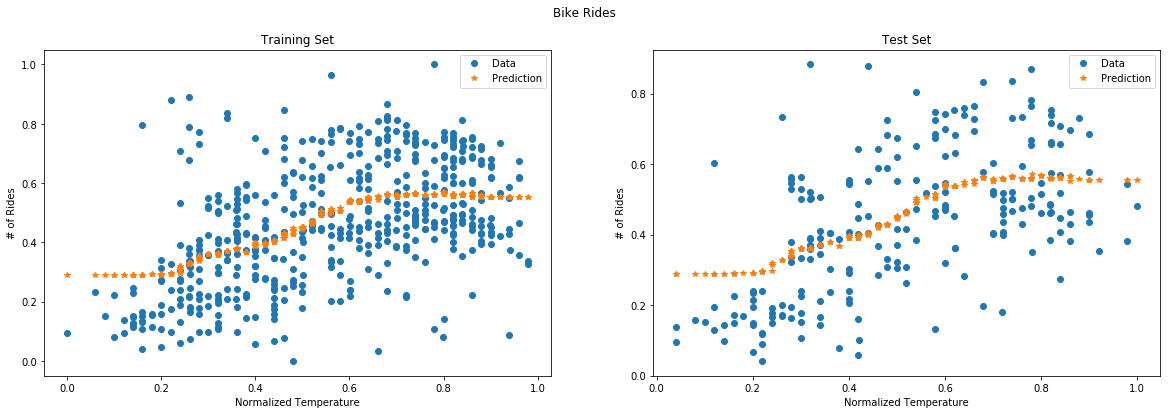

In [360]:
# SubPlots

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
#axes[0].set_xlim([0.5, 0.7])
axes[0].plot(train_data['temp'], train_data['count'], 'o', label = 'Data' )#, '*',  label='Predicted')
axes[0].plot(train_data['temp'], neighbors.predict(train_data[['temp']]), '*', label = 'Prediction')
axes[0].set_xlabel('Normalized Temperature')
axes[0].set_ylabel('# of Rides')
axes[0].set_title("Training Set")
axes[0].legend()

axes[1].plot(test_data['temp'], test_data['count'],'o', label = 'Data' )#, '*')
axes[1].plot(test_data['temp'], prediction_knn, '*', label = 'Prediction')
axes[1].set_xlabel('Normalized Temperature')
axes[1].set_ylabel('# of Rides')
axes[1].set_title("Test Set")
axes[1].legend()

fig.suptitle("Bike Rides");



<div class='exercise'> **Exercise**</div>

In [343]:
# Can you predict what will happen for k=1 and for k = number-of-observations-in-training-set? Try it!

# Linear Regression

We just went over the kNN prediction method. Now, we will fit the same data, but Linear Regression. We will use a the same training/testing dataset as before and create our linear regression objects.

In [344]:
#Split Data into X,Y
x_train, y_train = train_data.drop(['count'],axis=1), train_data['count']
x_test, y_test = test_data.drop(['count'],axis=1), test_data['count']

#Add constant
x_train_ca = sm.add_constant(x_train)
x_test_ca = sm.add_constant(x_test)

StatsModels use a Y followed by X structure while feeding data in contrast to sklearn that uses X followed by Y.

In [345]:
#We must first create the linear regression object from stats model

model = sm.OLS(y_train, x_train_ca)
results = model.fit()
print(results.params)

const    0.215881
temp     0.436202
dtype: float64


Now, we will compute metrics that can be used to assess fit.

**Note: sklearn.metrics is class of functions that consists of all the metrics we care about to evaluate our models. While it is not hard to implement them yourself, it is helpful to go through http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.**

In [346]:
#To compute the mean squared error (notice that we are now using the TEST set):
print("R^2 Score for Linear Regression (Training):", metrics.r2_score(y_train, results.predict(x_train_ca)))
print("R^2 Score for Linear Regression (Testing) :", metrics.r2_score(y_test, results.predict(x_test_ca)))

R^2 Score for Linear Regression (Training): 0.24501556486877962
R^2 Score for Linear Regression (Testing) : 0.3075073153596307


In [347]:
#Find the squared error:
y_pred_train = results.predict(x_train_ca)
squared_error_train = (y_pred_train - y_train)**2
 #Finding the mean squared error:
error_var_train = squared_error_train.mean()

sample_var_train = ((y_train - y_train.mean())**2).mean()



y_pred_test = results.predict(x_test_ca)
squared_error_test = (y_pred_test - y_test)**2
 #Finding the mean squared error:
error_var_test = squared_error_test.mean()

sample_var_test = ((y_test - y_test.mean())**2).mean()

print(error_var_train, sample_var_train, 1 - error_var_train/sample_var_train)
print(error_var_test, sample_var_test, 1 - error_var_test/sample_var_test)


0.030717074777741292 0.04068570602041948 0.24501556486877962
0.027767198568936727 0.04009746122207342 0.3075073153596307


In [330]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     201.9
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           7.91e-39
Time:                        12:15:33   Log-Likelihood:                 177.96
No. Observations:                 511   AIC:                            -351.9
Df Residuals:                     509   BIC:                            -343.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2069      0.019     10.862      0.000       0.169       0.244
temp           0.4633      0.033     14.208      0.000       0.399       0.527
==============================================================================
Omnibus:                       16.441   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.164
Skew:                           0.441   Prob(JB):                     0.000187
Kurtosis:                       3.168   Cond. No.                         5.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

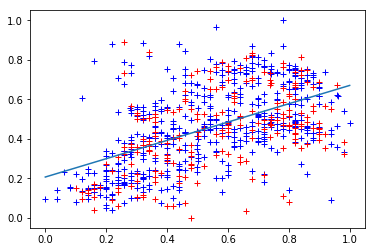

In [331]:
plt.plot(x_train, y_train, 'b+')
plt.plot(x_test, y_test, 'r+')

x_forpredict = np.linspace(0,1, 100)
line_y = results.predict(sm.add_constant(x_forpredict))
plt.plot(x_forpredict, line_y)

### Confidence Intervals

In Data Science, a confidence interval (CI) is a type of interval estimate, computed from the statistics of the observed data, that might contain the true value of an unknown population parameter. Simply speaking, a Confidence Interval is a range of values we are fairly sure our true value lies in. 

It is important to remind ourselves here that Confidence Intervals belong to a parameter and not a statistic. Thus, they represent the window in which the true value exists for the entire population when all we have is a sample.

#### Example : 

We measure the heights of 40 randomly chosen men, and get a mean height of 175cm, we also know the standard deviation of men's heights is 20cm. The 95% Confidence Interval is thus: 175cm ± 6.2cm. This says the true mean of ALL men (if we could measure all their heights) is likely to be between 168.8cm and 181.2cm.

But it might not be! The "95%" says that 95% of experiments like we just did will include the true mean, but 5% won't.
So there is a 1-in-20 chance (5%) that our Confidence Interval does NOT include the true mean.

#### Formula : $$\bar{X} \pm Z * \frac{s}{\sqrt{n}}$$

Where:

* $\bar{X}$ is the mean
* Z is the chosen Z-value from the table above
* s is the standard deviation
* n is the number of observations

To get Confidence Intervals using StatsModels:

In [ ]:
#Confidence Interval using Stats Model Summary
thresh = 0.05
intervals = results.conf_int(alpha=thresh)
intervals = intervals.rename(index=str, columns={0:str(thresh/2*100)+"%",1:str((1-thresh/2)*100)+"%"})
display(intervals)

In the above block of code, ```results.conf_int(alpha=thresh)``` returns a dataframe with columns 0 and 1. We explained Confidence Intervals above where because we assume normal symetric distribution of data, the 95% Confidence Interval means there's 2.5% chance of the true value lying below the values in Column 0 and 2.5% chance of the true value lying above Column 1. 

Therefore, for a better understanding, given a constant threshold, you can rename the columns to suit the Confidence Interval values. The syntax is ```dataframe.rename(index=str, columns={old_col_name1:new_col_name1, old_col_name2:new_col_name2})```

In [ ]:
train_x.shape